In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\dhire\Documents\Machine_learning_Inuron\ML_Live_Class\data\cement_slump.csv")

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

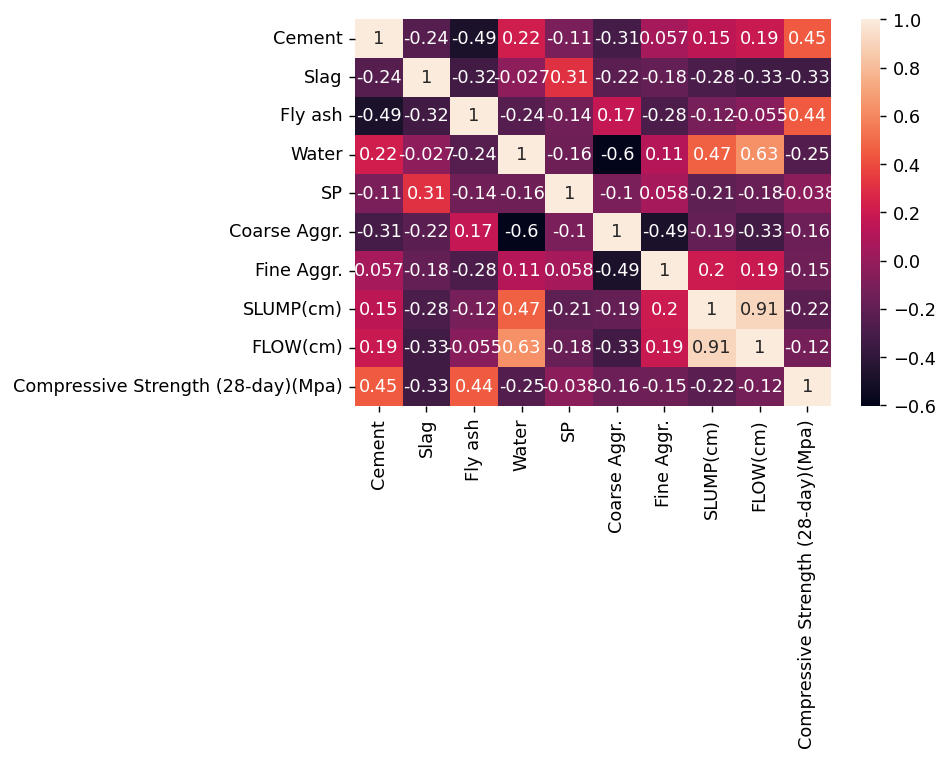

In [6]:
plt.figure(figsize=(6,4),dpi=128)
sns.heatmap(df.corr(),annot=True)

In [7]:
from sklearn.svm import SVR

In [11]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [15]:
df.shape

(103, 10)

In [12]:
x=df.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [13]:
y=df['Compressive Strength (28-day)(Mpa)']

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scalar=StandardScaler()

In [20]:
scaled_x_train=scalar.fit_transform(x_train)

In [21]:
scaled_x_test=scalar.transform(x_test)

In [22]:
from sklearn.svm import SVR,LinearSVR

In [23]:
base_model=SVR()

In [24]:
base_model.fit(scaled_x_train,y_train)

SVR()

In [25]:
base_preds=base_model.predict(scaled_x_test)

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [27]:
MAE=mean_absolute_error(y_test,base_preds)
MAE

4.680550861162789

In [28]:
RMSE=np.sqrt(mean_squared_error(y_test,base_preds))

In [29]:
RMSE

6.078255017457036

In [31]:
y_test.mean()

36.718387096774194

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {'C': [0.001, 0.01,0.1, 0.5, 1], 'kernel': ['linear', 'rbf', 'poly'], 'gamma' : ['scale', 'auto'], 'degree': [2,3,4], 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}
svr = SVR()

In [35]:
grid_model=GridSearchCV(svr,param_grid,cv=5)

In [38]:
grid_model.fit(scaled_x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [39]:
grid_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [40]:
grid_y_predict=grid_model.predict(scaled_x_test)

In [41]:
MAE=mean_absolute_error(y_test,grid_y_predict)
MAE

1.8530688105852025

In [42]:
RMSE=np.sqrt(mean_squared_error(y_test,grid_y_predict))
RMSE

2.2802712928130853

In [43]:
R2=r2_score(y_test,grid_y_predict)
R2

0.9077378064037342